# Preamble

In [7]:
%run -i scripts/preamble.py

# Introduction

As outlined in the Feasibility secition of my Milestone 3 submission, I have segmented the work over the next few weeks according to the following timeline

![](figures/timeline.png)

Below I proceed by structuring my response according to the following sections
- Model Specific Research
- Data exploration, preprocessing and environment setup
- Model Replication and Experimentation

# Model Specific Research

*__Fill out details from readings__*

On the basis of my reasearch and published results, I have chosen to investigate the following models:

__Shallow__
- Logistic Regression
- Factorization Machines

__Deep__
- Factorization Supported Neural Networks
- Product Based Neural Networks
- Wide and Deep
- DeepFM
- Feature Generation by Convolutional Neural Networks
- Automatic Feature Interaction (AutoInt)

# Data Exploration, preprocessing and environment setup

## Exploratory Data Analysis

/tmp/ipykernel_25209/1746979306.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticks(),rotation=45)
/tmp/ipykernel_25209/1746979306.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticks(),rotation=45)
/tmp/ipykernel_25209/1746979306.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2].set_xticklabels(ax[2].get_xticks(),rotation=45)


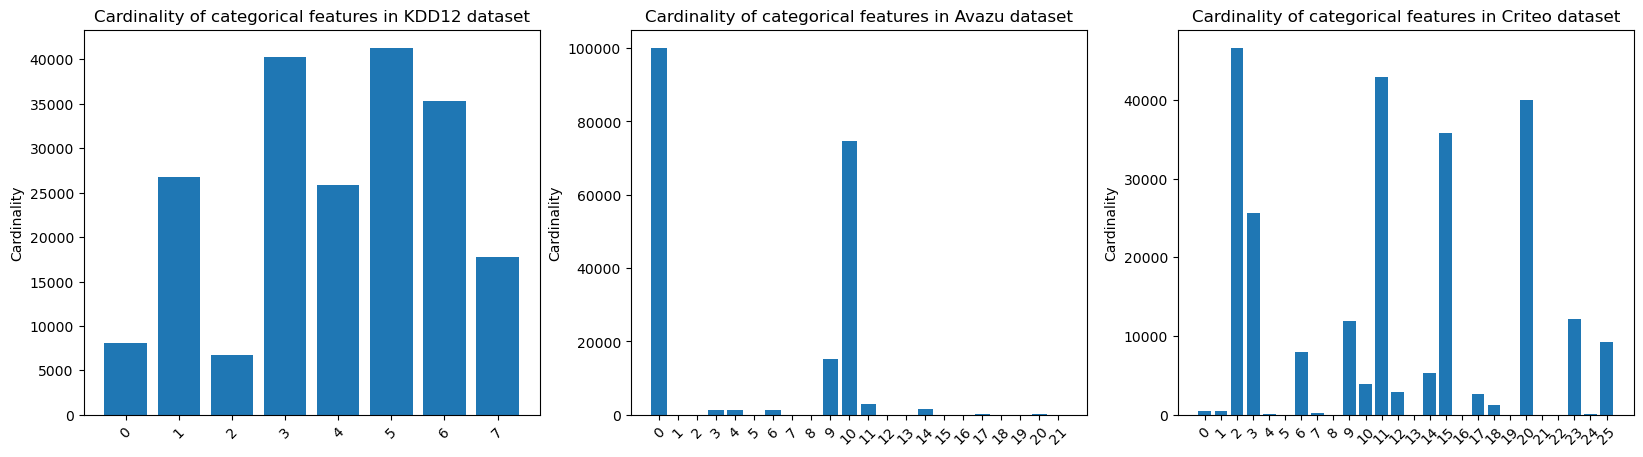

## Preprocessing

# Model Replication and Experimentation

In [44]:
%run -i scripts/modelling/load_and_prep_data.py

## Shallow Models

In order to attain representitive results from beyond the realm of deep learning, below I evaluate two of the most poplarly used shallow models for CTR prediction:

- Logistic regression
- Factorization machines

### Logistic Regression

In [9]:
%run -i scripts/modelling/fit_lr_models.py
%run -i scripts/modelling/score_lr_models.py
%run -i scripts/modelling/save_lr_models.py

KDD12:
Log loss: 0.1624932290324095
ROC AUC: 0.69918173566772
Accuracy: 0.95825

Avazu:
Log loss: 0.41220097439364145
ROC AUC: 0.7187736358180423
Accuracy: 0.83205

Criteo:
Log loss: 0.4934802677435992
ROC AUC: 0.7450124095275694
Accuracy: 0.7671


### Factorization Machine

In [12]:
%run -i scripts/modelling/fit_fm_models.py
%run -i scripts/modelling/score_fm_models.py
%run -i scripts/modelling/save_fm_models.py

KDD12:
Log loss: 0.31685987446578695
ROC AUC: 0.5336269490760196
Accuracy: 0.95825

Avazu:
Log loss: 10.974548402513749
ROC AUC: 0.5212335152327499
Accuracy: 0.66185

Criteo:
Log loss: 15.774504905747122
ROC AUC: 0.47794380839584155
Accuracy: 0.56235


## Deep Models

As explained above, I will be exploring the following deep models:

- Factorization Supported Neural Networks
- Product Based Neural Networks
- Wide and Deep
- DeepFM
- Feature Generation by Convolutional Neural Networks
- Automatic Feature Interaction (AutoInt)

### Factorization-Machine Supported Neural Networks

In [29]:
# Add this to the pramble
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from deepctr.models.fnn import FNN
from deepctr.feature_column import SparseFeat, DenseFeat, get_feature_names

In [46]:
# Generate feature columns

## Define the dense columns
kdd12_dense_features = [col for col in kdd12_standardized.columns.tolist() if col not in kdd12_categorical_columns+['click']]
avazu_dense_features = [col for col in avazu_standardized.columns.tolist() if col not in avazu_categorical_columns+['click']]
criteo_dense_features = [col for col in criteo_standardized.columns.tolist() if col not in criteo_categorical_columns+['click']]

## Define feature mappings
kdd12_fixlen_feature_columns = [SparseFeat(feat, vocabulary_size=kdd12_standardized[feat].unique().shape[0], embedding_dim=4) for feat in kdd12_categorical_columns]\
+ [DenseFeat(feat,1) for feat in kdd12_dense_features]
avazu_fixlen_feature_columns = [SparseFeat(feat, vocabulary_size=avazu_standardized[feat].unique().shape[0], embedding_dim=4) for feat in avazu_categorical_columns]\
+ [DenseFeat(feat,1) for feat in avazu_dense_features]
criteo_fixlen_feature_columns = [SparseFeat(feat, vocabulary_size=criteo_standardized[feat].unique().shape[0], embedding_dim=4) for feat in criteo_categorical_columns]\
+ [DenseFeat(feat,1) for feat in criteo_dense_features]

## Generate the dnn and linear feature columns
kdd12_dnn_feature_columns = kdd12_fixlen_feature_columns
kdd12_linear_feature_columns = kdd12_fixlen_feature_columns

avazu_dnn_feature_columns = avazu_fixlen_feature_columns
avazu_linear_feature_columns = avazu_fixlen_feature_columns

criteo_dnn_feature_columns = criteo_fixlen_feature_columns
criteo_linear_feature_columns = criteo_fixlen_feature_columns

## Get feature names
kdd12_feature_names = get_feature_names(kdd12_dnn_feature_columns + kdd12_linear_feature_columns)
avazu_feature_names = get_feature_names(avazu_dnn_feature_columns + avazu_linear_feature_columns)
criteo_feature_names = get_feature_names(criteo_dnn_feature_columns + criteo_linear_feature_columns)

In [50]:
# Define model inputs
kdd12_train_model_input = {name:kdd12_train_X[name].values for name in kdd12_feature_names}
kdd12_test_model_input = {name:kdd12_val_X[name].values for name in kdd12_feature_names}

avazu_train_model_input = {name:avazu_train_X[name].values for name in avazu_feature_names}
avazu_test_model_input = {name:avazu_val_X[name].values for name in avazu_feature_names}

criteo_train_model_input = {name:criteo_train_X[name].values for name in criteo_feature_names}
criteo_test_model_input = {name:criteo_val_X[name].values for name in criteo_feature_names}

In [54]:
# Compile the models
kdd12_fnn_model = FNN(kdd12_linear_feature_columns, kdd12_dnn_feature_columns, task='binary')
kdd12_fnn_model.compile("adam", "binary_crossentropy", metrics=['binary_crossentropy'], )

avazu_fnn_model = FNN(avazu_linear_feature_columns, avazu_dnn_feature_columns, task='binary')
avazu_fnn_model.compile("adam", "binary_crossentropy", metrics=['binary_crossentropy'], )

criteo_fnn_model = FNN(criteo_linear_feature_columns, criteo_dnn_feature_columns, task='binary')
criteo_fnn_model.compile("adam", "binary_crossentropy", metrics=['binary_crossentropy'], )

In [55]:
# Fit the models
kdd12_fnn_history = kdd12_fnn_model.fit(kdd12_train_model_input, kdd12_train_y, batch_size=256, epochs=10, verbose=2, validation_split=0.2, )
avazu_fnn_history = avazu_fnn_model.fit(avazu_train_model_input, avazu_train_y, batch_size=256, epochs=10, verbose=2, validation_split=0.2, )
criteo_fnn_history = criteo_fnn_model.fit(criteo_train_model_input, criteo_train_y, batch_size=256, epochs=10, verbose=2, validation_split=0.2, )

Epoch 1/10
250/250 - 16s - loss: 0.1951 - binary_crossentropy: 0.1950 - val_loss: 0.1745 - val_binary_crossentropy: 0.1743
Epoch 2/10
250/250 - 8s - loss: 0.1695 - binary_crossentropy: 0.1692 - val_loss: 0.1717 - val_binary_crossentropy: 0.1713
Epoch 3/10
250/250 - 8s - loss: 0.1669 - binary_crossentropy: 0.1665 - val_loss: 0.1726 - val_binary_crossentropy: 0.1721
Epoch 4/10
250/250 - 9s - loss: 0.1660 - binary_crossentropy: 0.1655 - val_loss: 0.1738 - val_binary_crossentropy: 0.1732
Epoch 5/10
250/250 - 10s - loss: 0.1657 - binary_crossentropy: 0.1651 - val_loss: 0.1723 - val_binary_crossentropy: 0.1717
Epoch 6/10
250/250 - 11s - loss: 0.1645 - binary_crossentropy: 0.1639 - val_loss: 0.1736 - val_binary_crossentropy: 0.1729
Epoch 7/10
250/250 - 11s - loss: 0.1641 - binary_crossentropy: 0.1634 - val_loss: 0.1733 - val_binary_crossentropy: 0.1727
Epoch 8/10
250/250 - 11s - loss: 0.1630 - binary_crossentropy: 0.1623 - val_loss: 0.1734 - val_binary_crossentropy: 0.1727
Epoch 9/10
250/250 

In [56]:
# Save the models
kdd12_fnn_model.save('models/fnn/kdd12_fnn_model.keras')
avazu_fnn_model.save('models/fnn/avazu_fnn_model.keras')
criteo_fnn_model.save('models/fnn/criteo_fnn_model.keras')

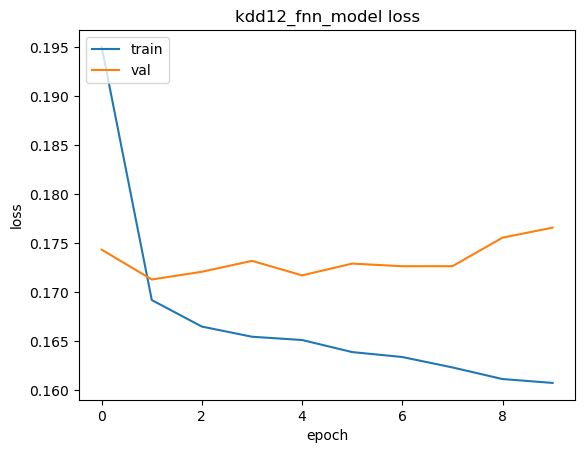

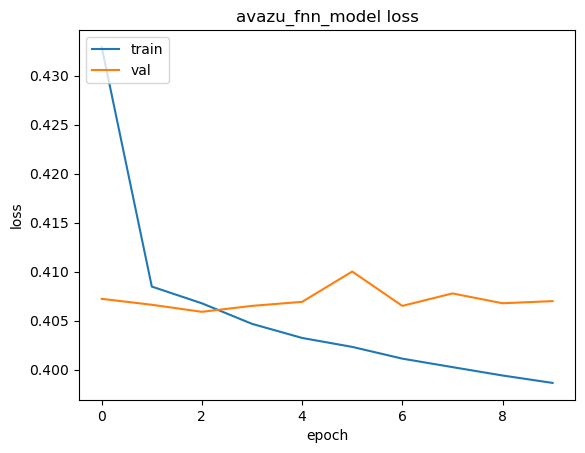

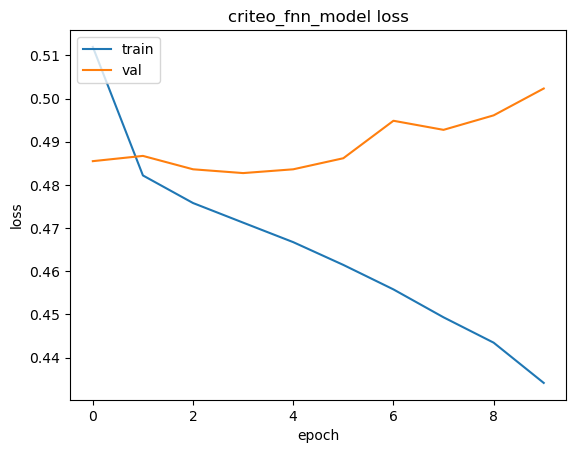

In [57]:
# Plot the training history
plt.plot(kdd12_fnn_history.history['binary_crossentropy'])
plt.plot(kdd12_fnn_history.history['val_binary_crossentropy'])
plt.title('kdd12_fnn_model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(avazu_fnn_history.history['binary_crossentropy'])
plt.plot(avazu_fnn_history.history['val_binary_crossentropy'])
plt.title('avazu_fnn_model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(criteo_fnn_history.history['binary_crossentropy'])
plt.plot(criteo_fnn_history.history['val_binary_crossentropy'])
plt.title('criteo_fnn_model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()